## 建置環境

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies


  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install git+https://github.com/ytdl-org/youtube-dl.git@master#egg=youtube_dl
  # build openpose
  with open("/content/openpose/CMakeLists.txt","r") as f:
    lines = list()
    for line in f:
      if '78287B57CF85FA89C03F1393D368E5B7' in line:
        line = line.replace('78287B57CF85FA89C03F1393D368E5B7','d41d8cd98f00b204e9800998ecf8427e')
      if '78287b57cf85fa89c03f1393d368e5b7' in line:
        line = line.replace('78287b57cf85fa89c03f1393d368e5b7','d41d8cd98f00b204e9800998ecf8427e')
      if 'e747180d728fa4e4418c465828384333' in line:
        line = line.replace('e747180d728fa4e4418c465828384333','d41d8cd98f00b204e9800998ecf8427e')
      if 'a82cfc3fea7c62f159e11bd3674c1531' in line:
        line = line.replace('a82cfc3fea7c62f159e11bd3674c1531','d41d8cd98f00b204e9800998ecf8427e')
      lines.append(line)
    f.close()
  # replacing the hash of the CMakeLists.txt
  with open("/content/openpose/CMakeLists.txt","w") as f:
    for line in lines:
        f.writelines(line)
    f.close()
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. -DUSE_CUDNN=OFF && make -j`nproc`

from IPython.display import YouTubeVideo

Selecting previously unselected package liblmdb0:amd64.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../00-liblmdb0_0.9.24-1build2_amd64.deb ...
Unpacking liblmdb0:amd64 (0.9.24-1build2) ...
Selecting previously unselected package libgflags2.2.
Preparing to unpack .../01-libgflags2.2_2.2.2-2_amd64.deb ...
Unpacking libgflags2.2 (2.2.2-2) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../02-libgflags-dev_2.2.2-2_amd64.deb ...
Unpacking libgflags-dev (2.2.2-2) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../03-libgoogle-glog0v5_0.5.0+really0.4.0-2_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.5.0+really0.4.0-2) ...
Selecting previously unselected package libunwind-dev:amd64.
Preparing to unpack .../04-libunwind-dev_1.3.2-2build2.1_amd64.deb ...
Unpacking libunwind-dev:amd64 (1.3.2-2build2.1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to un

## 連結雲端

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 刪除output資料夾的所有檔案

In [ ]:
!rm -f /content/openpose/output/*

In [ ]:
!rm -f /content/output.mp4
!rm -f /content/video.mp4

## 讀取影片範圍

In [ ]:
video_path = '/content/drive/MyDrive/Graduation project/test_video/enrolled_2/enrolled2_r_3.mp4'
# video_path = '/content/drive/MyDrive/20231208_145718.mp4'

# 特定秒數
# !ffmpeg -y -loglevel info -i "{video_path}" -ss '00:00:02' -to '00:00:20' video.mp4

# 完整影片
# !ffmpeg -y -loglevel info -i "{video_path}" video.mp4

# 旋轉影片
# transpose=1：順時針旋轉90度（向右旋轉）--> 測右腳
# transpose=2：逆時針旋轉90度（向左旋轉）--> 測左腳
!ffmpeg -y -loglevel info -i "{video_path}" -vf 'transpose=1' -c:a copy video.mp4
# !ffmpeg -y -loglevel info -i "{video_path}" -ss '00:00:10' -to '00:00:35' -vf 'transpose=2' -c:a copy video.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
# Check if video.mp4 exists
import os
if os.path.exists('/content/video.mp4'):
    # Run the subsequent commands
    !rm openpose.avi
    !cd /content/openpose && ./build/examples/openpose/openpose.bin --video /content/video.mp4 --write_json ./output/ --display 0 --write_video ../openpose.avi
    # Convert the result into MP4
    !ffmpeg -y -loglevel info -i openpose.avi output.mp4
else:
    print("Video file not found. Please check if the FFmpeg command ran successfully.")

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 88.471402 seconds.
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbi

## body_25 偵測影片結果

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)

## 紀錄關鍵點12~14時間

In [ ]:
import csv
import os
import json
import re  # Import regular expression module
from google.colab import files

# 要處理的資料夾路徑
folder_path = '/content/openpose/output'

# 收集該資料夾中所有的JSON檔案路徑
file_paths = sorted([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')])

# 創建包含需要保存的資料的列表
keypoints_data = []

# Define a regular expression pattern to extract numeric parts from the file name
numeric_pattern = re.compile(r'\d+')
# numeric_pattern = re.compile(r'video_(\d+)_keypoints')

for file_path in file_paths:
    with open(file_path) as f:
        data = json.load(f)

    if 'people' in data and len(data['people']) > 0:
            keypoints = data['people'][0]['pose_keypoints_2d']

            if not keypoints:
                continue

            x_coords = keypoints[0::3]
            y_coords = keypoints[1::3]
            c_coords = keypoints[2::3]

            # Extract numeric part from the file name using regular expression
            numeric_part = re.search(numeric_pattern, os.path.splitext(os.path.basename(file_path))[0].split("_")[1]).group()
            print(numeric_part)
            time = int(numeric_part) / 30
            print(time)
            keypoints_data.append([numeric_part, time, x_coords[12], y_coords[12], c_coords[12], x_coords[13], y_coords[13], c_coords[13], x_coords[14], y_coords[14], c_coords[14]])

# 將資料寫入CSV檔案
csv_filename = 'keypoints_12to14_timestamp(enrolled2_right_update).csv'
csv_file_path = os.path.join(folder_path, csv_filename)

with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Timestamp', 'Time', 'X_12', 'Y_12', 'C_12', 'X_13', 'Y_13', 'C_13', 'X_14', 'Y_14', 'C_14'])  # 寫入標題列

    for row in keypoints_data:
        csv_writer.writerow(row)

# 使用Colab的files模組下載檔案
files.download(csv_file_path)

000000000000
0.0
000000000001
0.03333333333333333
000000000002
0.06666666666666667
000000000003
0.1
000000000004
0.13333333333333333
000000000005
0.16666666666666666
000000000006
0.2
000000000007
0.23333333333333334
000000000008
0.26666666666666666
000000000009
0.3
000000000010
0.3333333333333333
000000000011
0.36666666666666664
000000000012
0.4
000000000013
0.43333333333333335
000000000014
0.4666666666666667
000000000015
0.5
000000000016
0.5333333333333333
000000000017
0.5666666666666667
000000000018
0.6
000000000019
0.6333333333333333
000000000020
0.6666666666666666
000000000021
0.7
000000000022
0.7333333333333333
000000000023
0.7666666666666667
000000000024
0.8
000000000025
0.8333333333333334
000000000026
0.8666666666666667
000000000027
0.9
000000000028
0.9333333333333333
000000000029
0.9666666666666667
000000000030
1.0
000000000031
1.0333333333333334
000000000032
1.0666666666666667
000000000033
1.1
000000000034
1.1333333333333333
000000000035
1.1666666666666667
000000000036
1.2
000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 12~14 angles繪圖

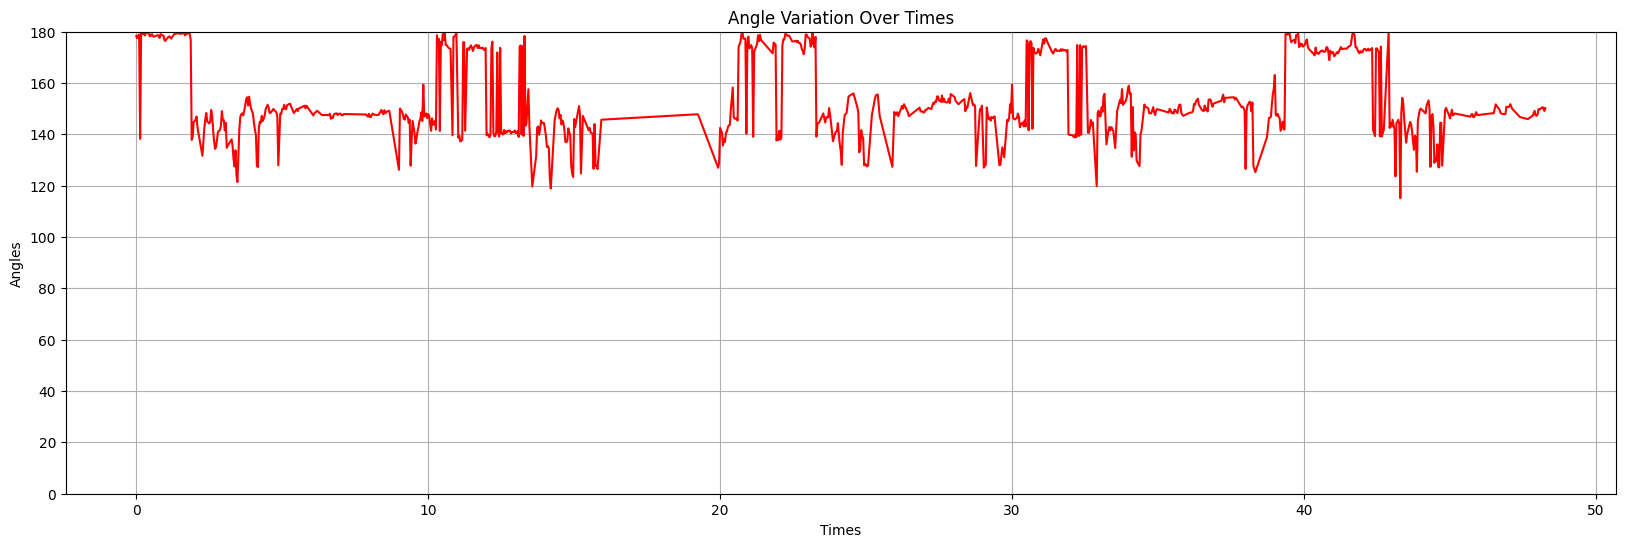

In [ ]:
import matplotlib.pyplot as plt
import os
import json
import numpy as np

# 要處理的資料夾路徑
folder_path = '/content/openpose/output'

# 收集該資料夾中所有的JSON檔案路徑
file_paths = sorted([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')])

angles = []
times = []
temp = []

for file_path in file_paths:
    with open(file_path) as f:
        data = json.load(f)
    # print(file_path)

    if 'people' in data and len(data['people']) > 0:
      for person in data['people']:
        keypoints = data['people'][0]['pose_keypoints_2d']

        if not keypoints:
          continue

    x_coords = keypoints[0::3]
    y_coords = keypoints[1::3]
    c_coords = keypoints[2::3]

    if c_coords[13] > 0.3:
        vec_12 = np.array([x_coords[12], y_coords[12]])
        vec_13 = np.array([x_coords[13], y_coords[13]])
        vec_14 = np.array([x_coords[14], y_coords[14]])

        u = vec_12 - vec_13
        v = vec_14 - vec_13

        inner_product = np.dot(u, v)
        length_product = (np.sqrt(pow(u[0], 2) + pow(u[1], 2))) * (np.sqrt(pow(v[0], 2) + pow(v[1], 2)))

        if inner_product != 0 and length_product != 0:
          cos_angle = inner_product / length_product
          pi_angle = np.arccos(cos_angle)
          angle = np.degrees(pi_angle)
        # 紀錄角度，y軸
        if angle > 60:
          angles.append(angle)
          # 紀錄時間，x軸
          numeric_part = re.search(numeric_pattern, os.path.splitext(os.path.basename(file_path))[0].split("_")[1]).group()
          times.append(int(numeric_part) / 30)
          # 紀錄角度及時間， 寫入csv
          temp.append([int(numeric_part) / 30, angle])

# 繪製折線圖
y = np.array(angles)
x = np.array(times)
plt.figure(figsize=(20, 6))  # 設定圖形大小
plt.plot(x, y, 'r')
plt.ylim(0, 180) #設定y軸範圍
plt.grid(True)
plt.title('Angle Variation Over Times')
plt.xlabel('Times')
plt.ylabel('Angles')
plt.show()

### angles 12~14 csv

In [ ]:
import csv

csv_filename = 'angles_data_12to14.csv'

with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Time', 'Angles'])  # 寫入標題行

    for row in temp:
      csv_writer.writerow(row)

files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 紀錄關鍵點9~11時間

In [ ]:
import csv
import os
import json
import re  # Import regular expression module
from google.colab import files

# 要處理的資料夾路徑
folder_path = '/content/openpose/output'

# 收集該資料夾中所有的JSON檔案路徑
file_paths = sorted([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')])

# 創建包含需要保存的資料的列表
keypoints_data = []

# Define a regular expression pattern to extract numeric parts from the file name
numeric_pattern = re.compile(r'\d+')
# numeric_pattern = re.compile(r'video_(\d+)_keypoints')

for file_path in file_paths:
    with open(file_path) as f:
        data = json.load(f)

    if 'people' in data and len(data['people']) > 0:
            keypoints = data['people'][0]['pose_keypoints_2d']

            if not keypoints:
                continue

            x_coords = keypoints[0::3]
            y_coords = keypoints[1::3]
            c_coords = keypoints[2::3]

            # Extract numeric part from the file name using regular expression
            numeric_part = re.search(numeric_pattern, os.path.splitext(os.path.basename(file_path))[0].split("_")[1]).group()
            print(numeric_part)
            time = int(numeric_part) / 30
            print(time)
            keypoints_data.append([numeric_part, time, x_coords[9], y_coords[9], c_coords[9], x_coords[10], y_coords[10], c_coords[10], x_coords[11], y_coords[11], c_coords[11]])

# 將資料寫入CSV檔案
csv_filename = 'keypoints_9to11_timestamp(enrolled2_right_update).csv'
csv_file_path = os.path.join(folder_path, csv_filename)

with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Timestamp', 'Time', 'X_9', 'Y_9', 'C_9', 'X_10', 'Y_10', 'C_10', 'X_11', 'Y_11', 'C_11'])  # 寫入標題列

    for row in keypoints_data:
        csv_writer.writerow(row)

# 使用Colab的files模組下載檔案
files.download(csv_file_path)

000000000000
0.0
000000000001
0.03333333333333333
000000000002
0.06666666666666667
000000000003
0.1
000000000004
0.13333333333333333
000000000005
0.16666666666666666
000000000006
0.2
000000000007
0.23333333333333334
000000000008
0.26666666666666666
000000000009
0.3
000000000010
0.3333333333333333
000000000011
0.36666666666666664
000000000012
0.4
000000000013
0.43333333333333335
000000000014
0.4666666666666667
000000000015
0.5
000000000016
0.5333333333333333
000000000017
0.5666666666666667
000000000018
0.6
000000000019
0.6333333333333333
000000000020
0.6666666666666666
000000000021
0.7
000000000022
0.7333333333333333
000000000023
0.7666666666666667
000000000024
0.8
000000000025
0.8333333333333334
000000000026
0.8666666666666667
000000000027
0.9
000000000028
0.9333333333333333
000000000029
0.9666666666666667
000000000030
1.0
000000000031
1.0333333333333334
000000000032
1.0666666666666667
000000000033
1.1
000000000034
1.1333333333333333
000000000035
1.1666666666666667
000000000036
1.2
000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 9~11 angles繪圖

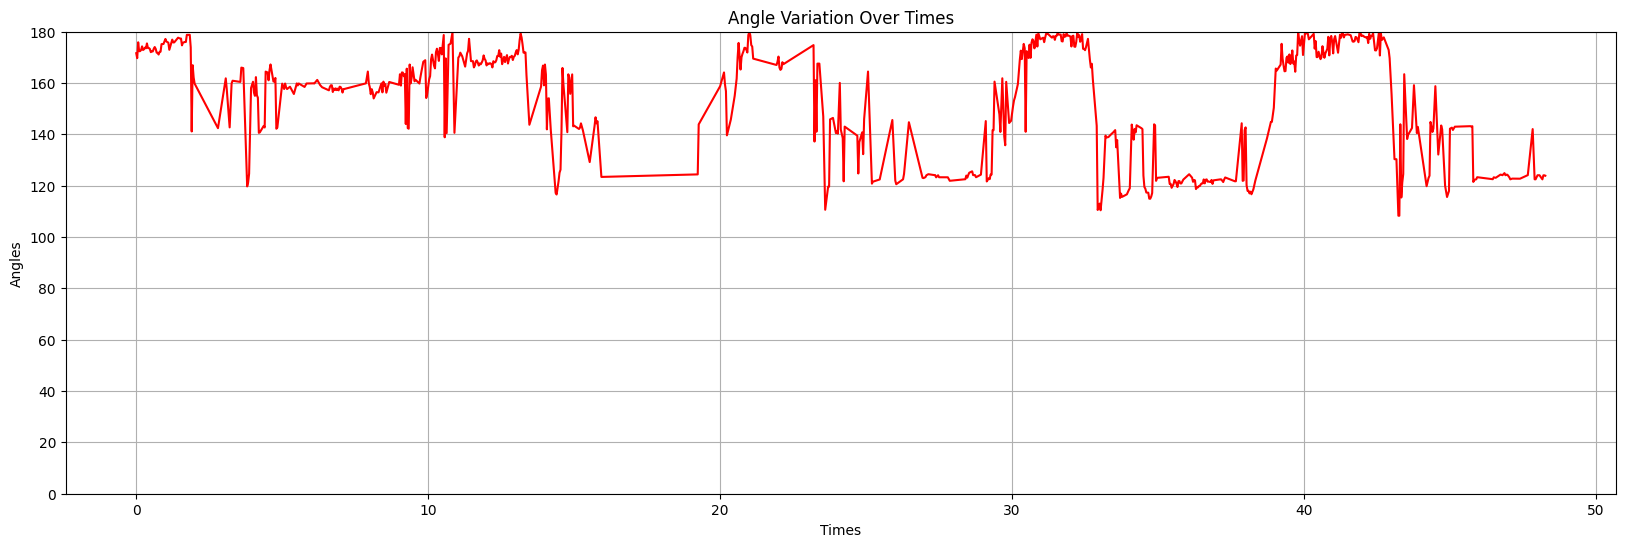

In [ ]:
import matplotlib.pyplot as plt
import os
import json
import numpy as np

# 要處理的資料夾路徑
folder_path = '/content/openpose/output'

# 收集該資料夾中所有的JSON檔案路徑
file_paths = sorted([os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.json')])

angles = []
times = []
temp = []

for file_path in file_paths:
    with open(file_path) as f:
        data = json.load(f)
    # print(file_path)

    if 'people' in data and len(data['people']) > 0:
      for person in data['people']:
        keypoints = data['people'][0]['pose_keypoints_2d']

        if not keypoints:
          continue

    x_coords = keypoints[0::3]
    y_coords = keypoints[1::3]
    c_coords = keypoints[2::3]

    if c_coords[13] > 0.35:
        vec_9 = np.array([x_coords[9], y_coords[9]])
        vec_10 = np.array([x_coords[10], y_coords[10]])
        vec_11 = np.array([x_coords[11], y_coords[11]])

        u = vec_9 - vec_10
        v = vec_11 - vec_10

        inner_product = np.dot(u, v)
        length_product = (np.sqrt(pow(u[0], 2) + pow(u[1], 2))) * (np.sqrt(pow(v[0], 2) + pow(v[1], 2)))

        if inner_product != 0 and length_product != 0:
          cos_angle = inner_product / length_product
          pi_angle = np.arccos(cos_angle)
          angle = np.degrees(pi_angle)
        # 紀錄角度，y軸
        if angle > 60:
          angles.append(angle)
          # 紀錄時間，x軸
          numeric_part = re.search(numeric_pattern, os.path.splitext(os.path.basename(file_path))[0].split("_")[1]).group()
          times.append(int(numeric_part) / 30)
          # 紀錄角度及時間， 寫入csv
          temp.append([int(numeric_part) / 30, angle])

# 繪製折線圖
y = np.array(angles)
x = np.array(times)
plt.figure(figsize=(20, 6))  # 設定圖形大小
plt.plot(x, y, 'r')
plt.ylim(0, 180) #設定y軸範圍
plt.grid(True)
plt.title('Angle Variation Over Times')
plt.xlabel('Times')
plt.ylabel('Angles')
plt.show()

### angles 9~11 csv

In [ ]:
import csv

csv_filename = 'angles_data_9to11.csv'

with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Time', 'Angles'])  # 寫入標題行

    for row in temp:
      csv_writer.writerow(row)

files.download(csv_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 輸入csv處理平滑

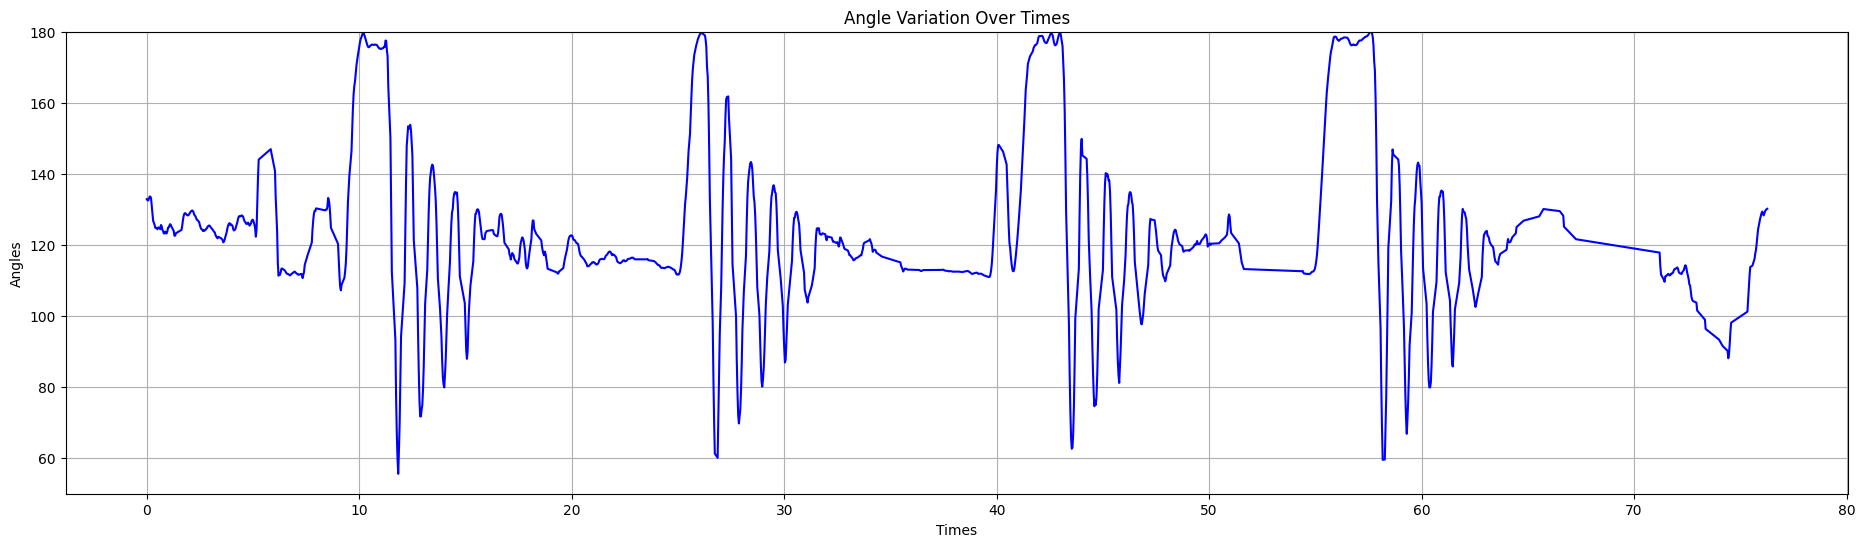

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.signal
import pywt

# Read CSV file
df = pd.read_csv('angles_data_9to11_3.csv')
x = np.array(df['Time'])
y = np.array(df['Angles'])

y_smooth = scipy.signal.savgol_filter(y,11,3, mode= 'nearest')
y_mid = pd.Series(y_smooth)
y_moving1 = np.array(y_mid.rolling(1).mean())
y_moving2 = np.array(df['Angles'].rolling(3).mean())

fig = plt.figure(figsize=(23, 6))
# plt.plot(x, y_smooth, 'b', marker = 'o')
plt.plot(x, y_smooth, 'b')
plt.ylim(50, 180) #將y軸限制在50到180的範圍內
plt.grid(True)
plt.title('Angle Variation Over Times')
plt.xlabel('Times')
plt.ylabel('Angles')
plt.show()

## 處理電子量角器的 txt (Healthy joint)

             Time  Linear Transformer Gonio G
0        0.003906                       0.000
1        0.007812                       0.000
2        0.011719                       0.000
3        0.015625                       0.000
4        0.019531                       0.000
...           ...                         ...
32091  125.359375                      52.633
32092  125.363281                      52.391
32093  125.367188                      52.512
32094  125.371094                      52.391
32095  125.375000                      52.391

[32096 rows x 2 columns]


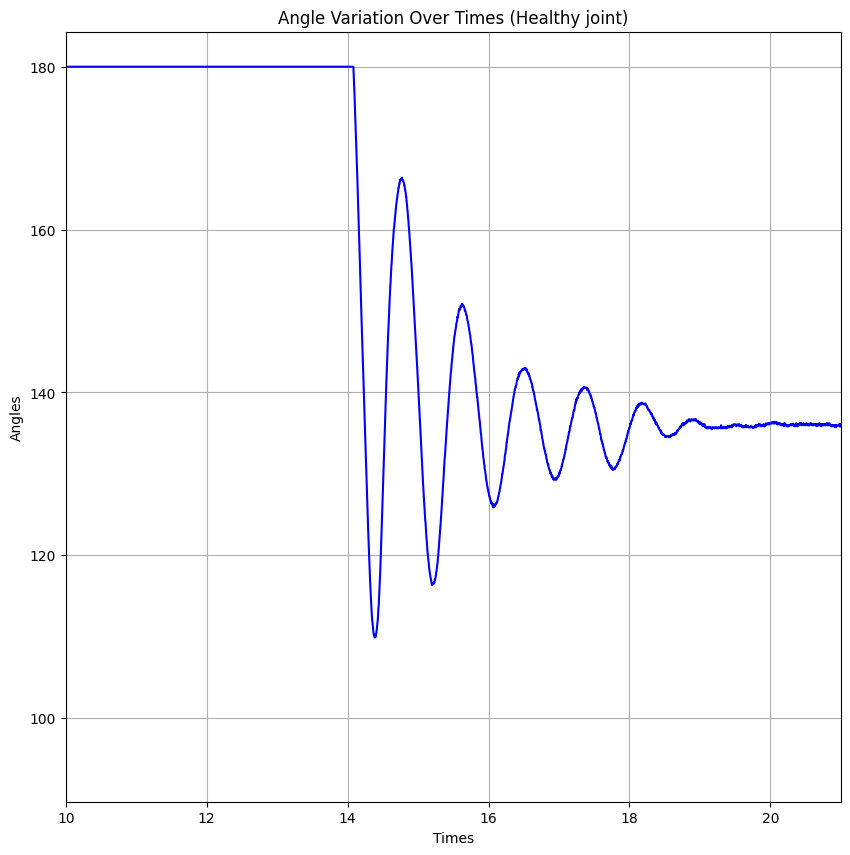

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.signal
import pywt

df = pd.read_csv('R_leg_001.txt', sep=",")
print(df)

y = np.array(180 - df['Linear Transformer Gonio G'])
#y = np.array(df['Linear Transformer Gonio G'])
x = np.array(df['Time'])

#print(df['Time'])
#print(df['Goniometer Adapter - 1G'])
#y1 = np.array(df['Time'])
#y2 = np.array(df['Goniometer Adapter - 1G'])
#y3 = np.array(180-y2)
#x = np.array(range(len(y1)))

fig = plt.figure(figsize=(10, 10))
plt.plot(x, y, 'b')
#plt.ylim(60, 180)
plt.xlim(10, 21)
plt.grid(True)
plt.title('Angle Variation Over Times (Healthy joint)')
plt.xlabel('Times')
plt.ylabel('Angles')
plt.show()

## 處理電子量角器的 txt (Affected joint)

            Time  Linear Transformer Gonio G
0       0.003906                      81.401
1       0.007812                      81.268
2       0.011719                      81.201
3       0.015625                      81.134
4       0.019531                      81.134
...          ...                         ...
23419  91.484375                      36.456
23420  91.488281                      36.523
23421  91.492188                      36.590
23422  91.496094                      36.590
23423  91.500000                      36.523

[23424 rows x 2 columns]


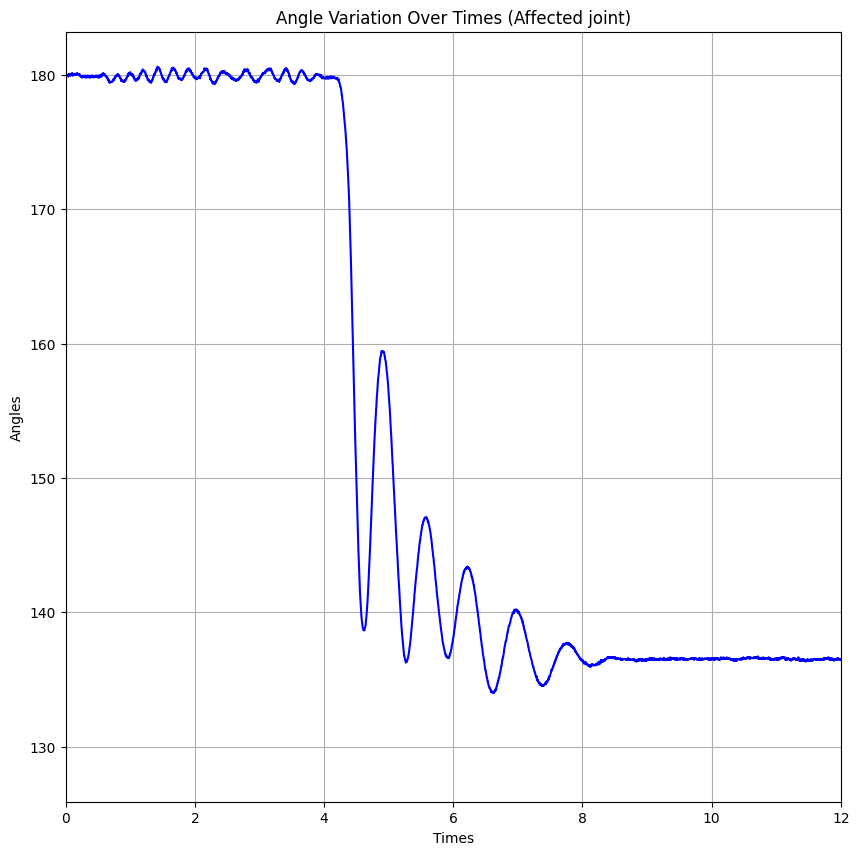

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.signal
import pywt

df = pd.read_csv('L_leg_001.txt', sep=",")
print(df)

#y = np.array(180 - df['Linear Transformer Gonio G'])
y = np.array(df['Linear Transformer Gonio G'] + 99)
x = np.array(df['Time']-2)

#print(df['Time'])
#print(df['Goniometer Adapter - 1G'])
#y1 = np.array(df['Time'])
#y2 = np.array(df['Goniometer Adapter - 1G'])
#y3 = np.array(180-y2)
#x = np.array(range(len(y1)))

fig = plt.figure(figsize=(10, 10))
plt.plot(x, y, 'b')
#plt.ylim(60, 180)
plt.xlim(0, 12)
plt.grid(True)
plt.title('Angle Variation Over Times (Affected joint)')
plt.xlabel('Times')
plt.ylabel('Angles')
plt.show()

## txt 轉 csv

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

df = pd.read_csv('R_leg_001.txt', sep=",")

# 將時間和角度資料從 DataFrame 中提取
time = np.array(df['Time'])
angles = np.array(df['Linear Transformer Gonio G'])

# 建立包含時間和角度資料的新的 DataFrame
data = {'Time': time, 'Angles': angles}
new_df = pd.DataFrame(data)

# 將新的 DataFrame 寫入 CSV 文件
new_df.to_csv('elec_angles.csv', index=False)

# 下載文件
files.download('elec_angles.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 參數分析
### 局部最大值及最小值

### method 1

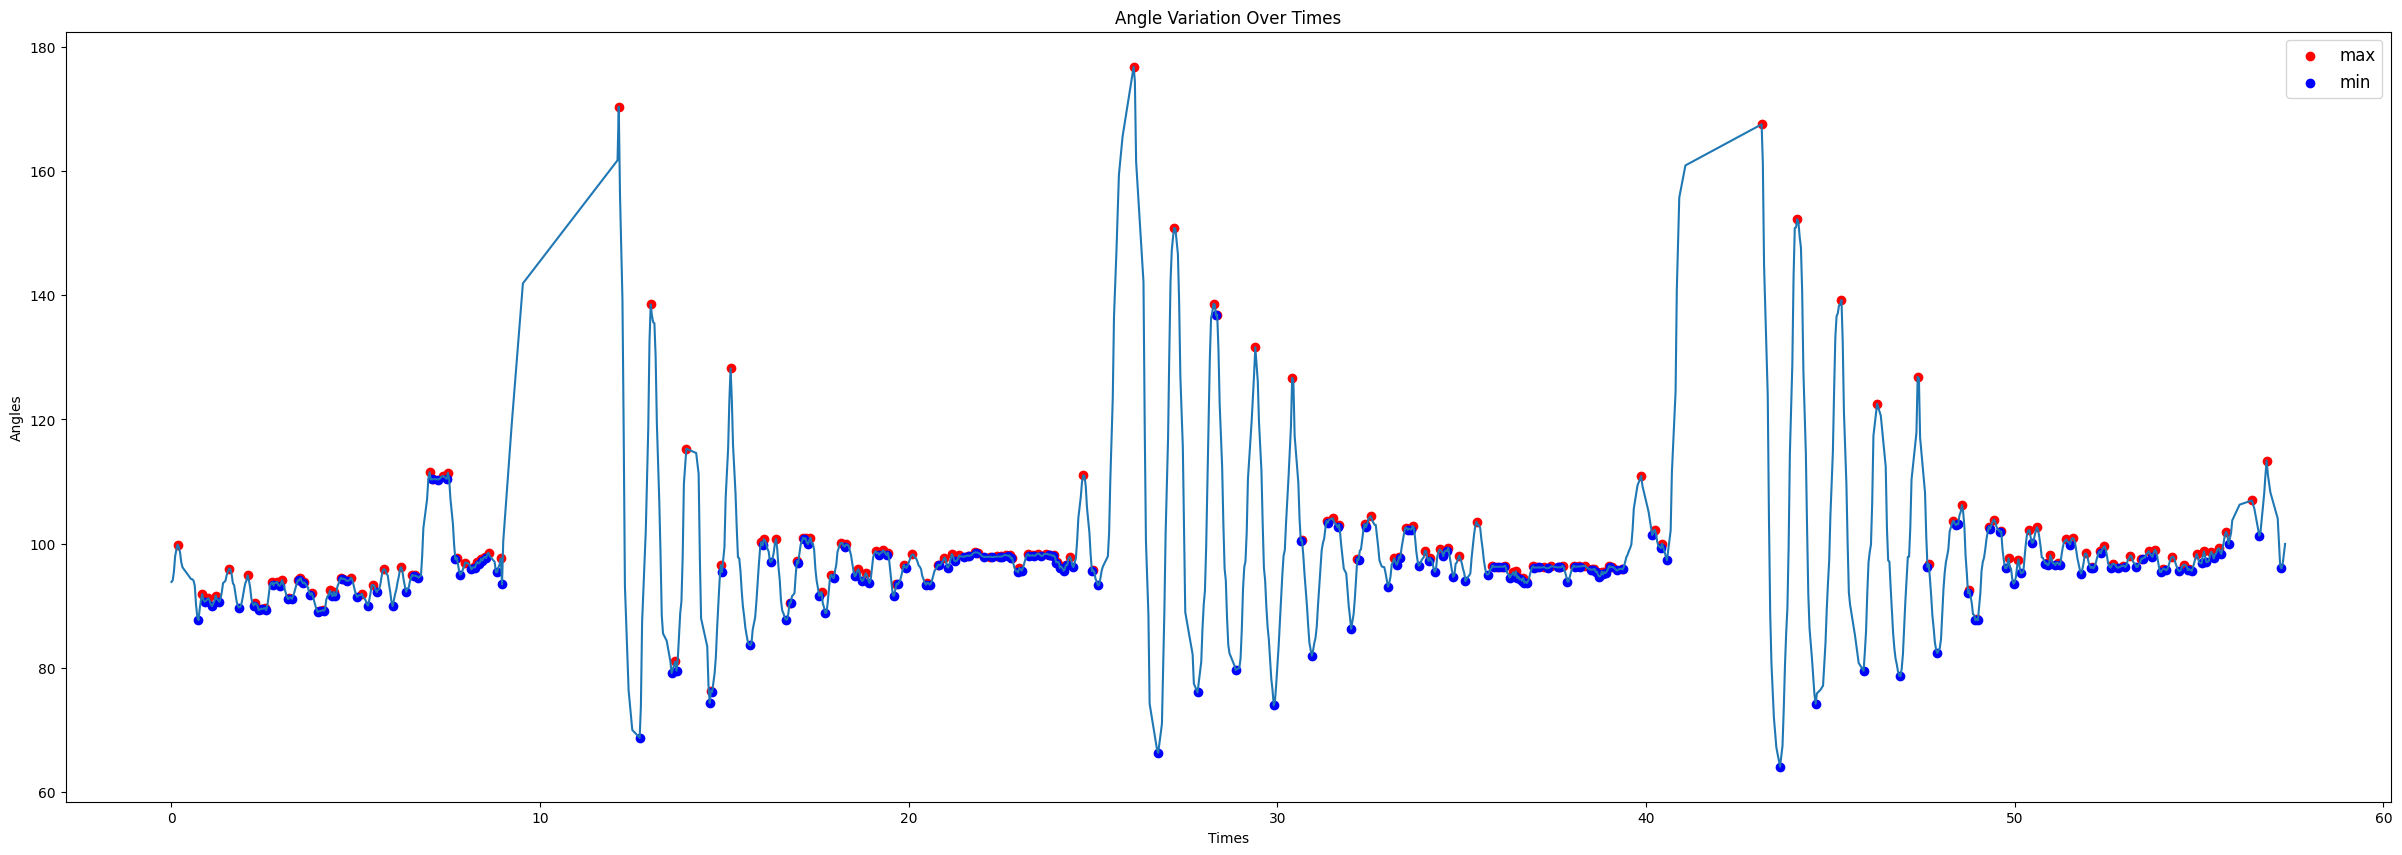

In [ ]:
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal

df = pd.read_csv('angles_data_9to11_7.csv')
time = np.array(df['Time'])
angles = np.array(df['Angles'])
#angles_smooth = np.array(df['Angles'])

# local max (index)
#argrelextrema(angles, np.greater)
# local min (index)
#argrelextrema(angles, np.less)

# smooth
angles_smooth = scipy.signal.savgol_filter(angles, 7, 3, mode= 'nearest')

max_index = argrelextrema(angles_smooth, np.greater)
min_index = argrelextrema(angles_smooth, np.less)

fig = plt.figure(figsize=(30, 10))
plt.plot(time, angles_smooth)
plt.scatter(
    # argrelextrema(angles, np.greater),
    time[max_index],
    angles_smooth[max_index],
    c='red',
    label='max'
)

plt.scatter(
    time[min_index],
    angles_smooth[min_index],
    c='blue',
    label='min'
)

plt.legend(loc=1, fontsize='large')
# plt.grid(True) # 背景網格線
plt.title('Angle Variation Over Times')
plt.xlabel('Times')
plt.ylabel('Angles')
plt.show()

### method 2

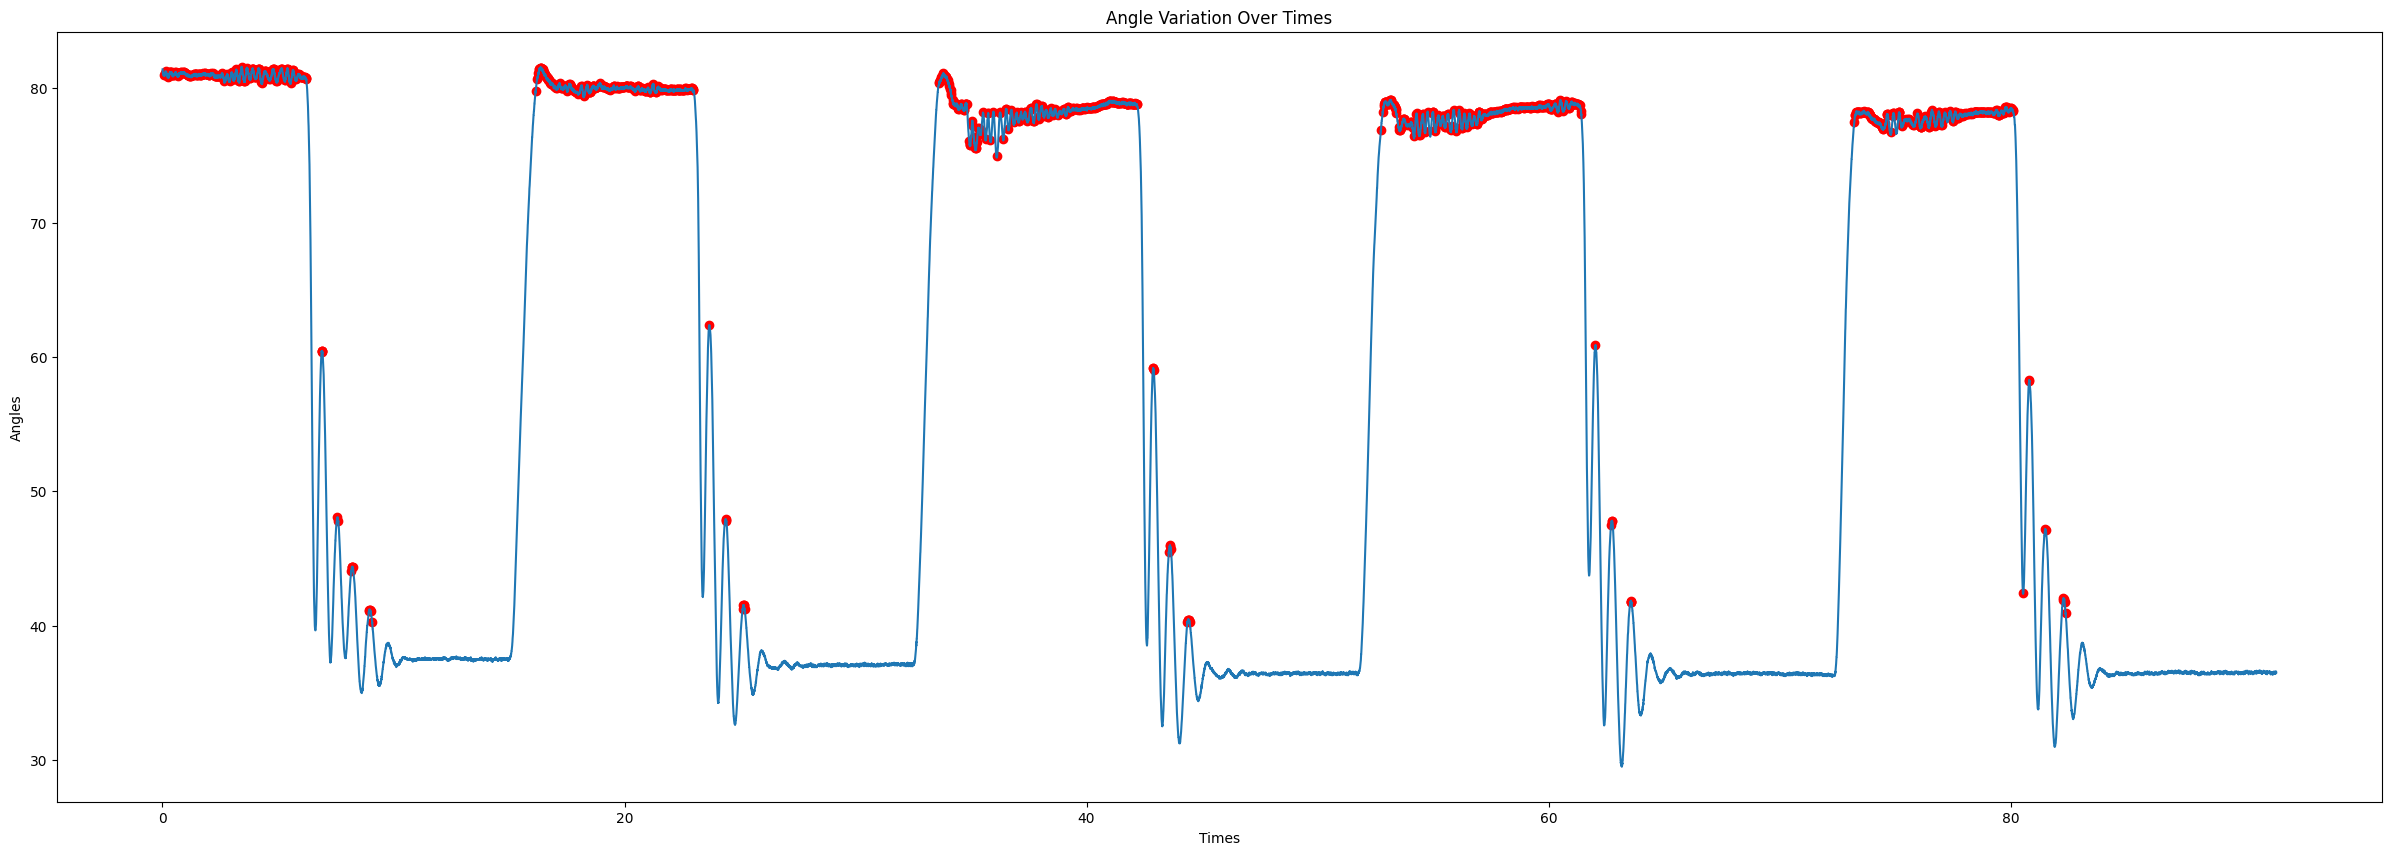

In [ ]:
from scipy.signal import find_peaks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('elec_angles.csv')
time = np.array(df['Time'])
angles = np.array(df['Angles'])

# 找到局部最大值的索引
peaks, _ = find_peaks(angles, height=40) # 調整範圍

fig = plt.figure(figsize=(30, 10))
plt.plot(time, angles)
plt.scatter(
    time[peaks],
    angles[peaks],
    c='red'
)
plt.title('Angle Variation Over Times')
plt.xlabel('Times')
plt.ylabel('Angles')
plt.show()

### 取最高點數值

In [ ]:
import numpy as np

k = 20
n = 5

# 前k個最大值的index
angles_sort = angles_smooth.argsort()[-k:]
print(angles_smooth[angles_sort])

# 計算最大值的平均
max_mean = np.mean(angles_smooth[angles_sort])
print("Max mean: ", max_mean)

#angles_smooth_split = np.array_split(angles_smooth, n)
#print(angles_smooth_split)

#print(angles_smooth[max_index])
#print(angles_smooth[min_index])

[81.4261978  81.42808767 81.42863849 81.43854121 81.44186763 81.44417686
 81.45635797 81.45685408 81.45749135 81.46186814 81.46503034 81.46591708
 81.46849166 81.48251552 81.48417009 81.50224209 81.50334655 81.50987724
 81.51346264 81.51591354]
Max mean:  81.46755239660038


### 取得頻率最高的兩個範圍

In [ ]:
angles_min = angles_smooth[min_index]
angles_max = angles_smooth[max_index]

range_width = 1  # 设置范围宽度
step_size = 0.1  # 设置步长

ranges = np.arange(min(angles_min), max(angles_min), step_size)
hist, _ = np.histogram(angles_min, bins=ranges)
max_freq_range = np.argmax(hist)
start_value = ranges[max_freq_range]
end_value = ranges[max_freq_range + range_width]

values_in_range = angles_min[(angles_min >= start_value) & (angles_min <= end_value)]
min_mean = np.mean(values_in_range)
print("频率最高的范围大概是：", start_value, "~", end_value)
# print("该范围内所有值的平均值为：", min_mean)

filtered_data = angles_min[(angles_min > end_value+0.5)]
#print(filtered_data)
print("\n")

ranges = np.arange(min(filtered_data), max(filtered_data), step_size)
hist, _ = np.histogram(filtered_data, bins=ranges)
max_freq_range = np.argmax(hist)
start_value = ranges[max_freq_range]
end_value = ranges[max_freq_range + range_width]

# values_in_range = filtered_data[(filtered_data >= start_value) & (filtered_data <= end_value)]
# mean = np.mean(values_in_range)
print("频率最高的范围大概是：", start_value, "~", end_value)
# print("该范围内所有值的平均值为：", min_mean)

print("\n")
filtered_data_max = angles_max[(angles_max < end_value-2)]
filtered_data_min = angles_min[(angles_min < end_value-2)]
print(filtered_data_max)
print("\n")
print(filtered_data_min)

频率最高的范围大概是： 37.42779745171324 ~ 37.52779745171324


频率最高的范围大概是： 80.97706674082283 ~ 81.07706674082283


[60.45163131 48.06315138 44.34694924 41.16891556 35.55957832 35.55231328
 38.67806229 38.68519051 37.02902285 37.06407119 37.08804358 37.0875765
 37.63957225 37.63966741 37.62406937 37.61766478 37.60907958 37.60710598
 37.57650642 37.50405127 37.51114501 37.51366033 37.51425301 37.51985115
 37.50690009 37.4853517  37.47252604 37.47639468 37.48061563 37.47199757
 37.46755981 37.44100101 37.4430539  37.45619699 37.4898377  37.52436323
 37.51932531 37.52566084 37.51994489 37.51328314 37.49585863 37.49387491
 37.51028517 37.5151711  37.52048337 37.50600738 37.49324876 37.49368905
 37.4910092  37.49701952 37.51894196 37.5534418  37.55381313 37.55490383
 37.55120508 37.52457963 37.51771837 37.52516493 37.54466822 37.54749095
 37.553838   37.49304025 37.49645171 37.54094671 37.54073101 37.54340307
 37.54088432 37.54322651 37.54207392 37.53748225 37.53180241 37.52007625
 37.52450339 37.51414

### pendulum test

In [ ]:
threshold = min_mean
a = filtered_data_max[0]
b = filtered_data_min[0]
c = filtered_data_max[1]
d = filtered_data_min[1]
print(f"a={a}, b={b}, c={c}, d={d}")

a0 = a - threshold
a1 = a - b
a2 = c - b
a3 = c - threshold
a4 = c - d
print(f"A0={a0}, A1={a1}, A2={a2}, A3={a3}, A4={a4}")

p1 = a1 / (1.6 * a0)
p4 = a3
p5 = a4 / (1.6 * a3)
print(f"p1={p1}, p4={p4}, p5={p5}")

a=60.45163130751198, b=39.62153514005368, c=48.06315138032044, d=37.32965244210652
A0=22.95510276590425, A1=20.8300961674583, A2=8.441616240266761, A3=10.56662283871271, A4=10.73349893821392
p1=0.5671423141698403, p4=10.56662283871271, p5=0.634870472693143


### 取 rest state 的數值範圍

In [ ]:
import numpy as np

angles_1 = angles_smooth[min_index]

range_width = 1  # 设置范围宽度
step_size = 0.1  # 设置步长

# 创建范围
ranges = np.arange(min(angles_1), max(angles_1), step_size)

# 计算每个范围中的频率
hist, _ = np.histogram(angles_1, bins=ranges)

# 找到频率最高的范围
max_freq_range = np.argmax(hist)

# 获取频率最高的范围的起始和结束值
start_value = ranges[max_freq_range]
end_value = ranges[max_freq_range + range_width]

# 找到在该范围内的所有值
values_in_range = angles_1[(angles_1 >= start_value) & (angles_1 <= end_value)]

# 计算这些值的平均值
min_mean = np.mean(values_in_range)

print("频率最高的范围大概是：", start_value, "~", end_value)
print("该范围内所有值的平均值为：", min_mean)


频率最高的范围大概是： 36.445518151480854 ~ 36.545518151480856
该范围内所有值的平均值为： 36.487100979053785


### 查看smooth過後的數值

In [ ]:
# 假设你有一个名为data的numpy数组
import numpy as np

# 将数组写入文件
with open("output.txt", "w") as f:
    for item in angles_smooth:
        f.write("%s\n" % item)


### 垃圾

In [ ]:
print(angles_smooth[max_index])
print(angles_smooth[min_index])

angles_min = angles_smooth[min_index]
angles_max = angles_smooth[max_index]

range_width = 1  # 设置范围宽度
step_size = 0.1  # 设置步长

ranges_min = np.arange(min(angles_min), max(angles_min), step_size)
hist_min, _ = np.histogram(angles_min, bins=ranges)
max_freq_range_min = np.argmax(hist_min)
start_value_min = ranges[max_freq_range_min]
end_value_min = ranges[max_freq_range_min + range_width]
values_in_range_min = angles_min[(angles_min >= start_value_min) & (angles_min <= end_value_min)]
min_mean = np.mean(values_in_range_min)

print("频率最高的范围大概是：", start_value_min, "~", end_value_min)
print("该范围内所有值的平均值为：", min_mean)

ranges_max = np.arange(min(angles_max), max(angles_max), step_size)
hist_max, _ = np.histogram(angles_max, bins=ranges)
max_freq_range_max = np.argmax(hist_max)
start_value_max = ranges[max_freq_range_max]
end_value_max = ranges[max_freq_range_max + range_width]
values_in_range_max = angles_max[(angles_max >= start_value_max) & (angles_max <= end_value_max)]
max_mean = np.mean(values_in_range_max)

print("频率最高的范围大概是：", start_value_max, "~", end_value_max)
print("该范围内所有值的平均值为：", max_mean)


[81.19114127 81.15453463 81.16388573 ... 36.52352169 36.52605562
 36.53008009]
[80.92586955 80.81727    81.15448923 ... 36.52337941 36.52499869
 36.527973  ]
频率最高的范围大概是： 36.445518151480854 ~ 36.545518151480856
该范围内所有值的平均值为： 36.487100979053785
频率最高的范围大概是： 36.445518151480854 ~ 36.545518151480856
该范围内所有值的平均值为： 36.48636855070029


### 切分n段數據(失敗)

anglessssssss:  [81.27940257 81.25141713 81.22205289 ... 36.52905703 36.52949742
 36.53367095]
len:  23424
max_mean:  81.49148837091528
min_mean:  36.487100979053785
first_index:  871 element:  81.4115510162788
last_index:  2176 element:  36.55816007685221
Selected values for iteration 1 : [81.41155102 81.43854121 81.46503034 ... 36.7806669  36.6693788
 36.55816008]
Remaining values for iteration 1 : [36.55816008 36.45469198 36.35345576 ... 36.52905703 36.52949742
 36.53367095]

max_mean:  81.49148837091528
min_mean:  36.487100979053785
first_index:  2000 element:  81.39363363332807
last_index:  4132 element:  36.395105268479284
Selected values for iteration 2 : [81.39363363 81.41070128 81.42408201 ... 36.8024507  36.59453534
 36.39510527]
Remaining values for iteration 2 : [36.39510527 36.2011619  36.00593579 ... 36.52905703 36.52949742
 36.53367095]

max_mean:  81.49148837091528
min_mean:  36.487100979053785
Selected values for iteration 3 : None
Remaining values for iteration 3 : [3

ValueError: x, y, and format string must not be None

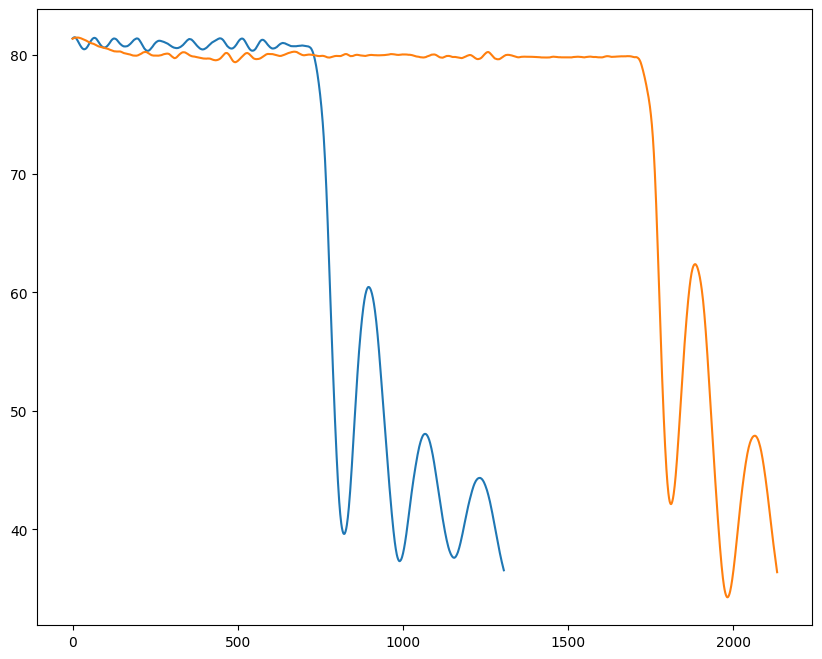

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 5
tolerance = 0.1

# 定义函数来切分数组
def split_array(arr, min_mean, max_mean):
    first_index = 0
    last_index = 0
    for index, element in enumerate(arr):
        if max_mean - tolerance <= element <= max_mean + tolerance:
            first_index = index
            print("first_index: ", first_index, "element: ", element)  # 添加这行来输出 first_index
            break

    if first_index == 0:
        return None, arr  # 如果未找到第一个索引，则返回None

    for index, element in enumerate(arr[first_index+1:], start=first_index+1):
        if min_mean - tolerance <= element <= min_mean + tolerance:
            last_index = index
            print("last_index: ", last_index, "element: ", element)  # 添加这行来输出 last_index
            break

    if last_index == 0:
        return None, arr  # 如果未找到最后一个索引，则返回None

    selected = arr[first_index:last_index+1]
    remaining = arr[last_index:]
    return selected, remaining

# 初始化数组
remaining_angles = angles_smooth

# 创建图形
plt.figure(figsize=(10, 8))

print("anglessssssss: ", angles_smooth)
print("len: ", len(angles_smooth))

# 循环切分数组
for i in range(n):
    print("max_mean: ", max_mean)
    print("min_mean: ", min_mean)
    # 切分数组
    selected, remaining_angles = split_array(remaining_angles, min_mean, max_mean)
    print("Selected values for iteration", i+1, ":", selected)
    print("Remaining values for iteration", i+1, ":", remaining_angles)
    print()

    # 绘制折线图
    plt.plot(selected, label='Iteration {}'.format(i+1))

# 添加标签和图例
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Selected Values in Each Iteration')
plt.legend()

# 显示图形
#plt.grid(True)
plt.show()
